In [4]:
import numpy as np
import scanpy as sc
import anndata as an
import pandas as pd

## Import Data

In [5]:
data = an.read_h5ad("/opt/extra-storage/pf2_results/cytok_pf2_30.h5ad")

In [6]:
sc.pp.neighbors(data, use_rep="projections")
sc.tl.leiden(data)

         Falling back to preprocessing with `sc.pp.pca` and default params.


/home/brianoj/.cache/pypoetry/virtualenvs/sccp-rvA4szVo-py3.11/lib/python3.11/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


## PF2 PACMAPs

/home/brianoj/.cache/pypoetry/virtualenvs/sccp-rvA4szVo-py3.11/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/brianoj/.cache/pypoetry/virtualenvs/sccp-rvA4szVo-py3.11/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


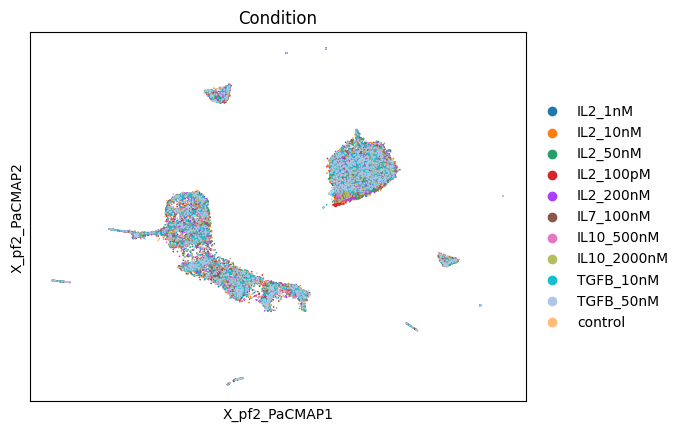

In [8]:
sc.pl.embedding(data, basis="X_pf2_PaCMAP", color=["Condition"])

/home/brianoj/.cache/pypoetry/virtualenvs/sccp-rvA4szVo-py3.11/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/brianoj/.cache/pypoetry/virtualenvs/sccp-rvA4szVo-py3.11/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


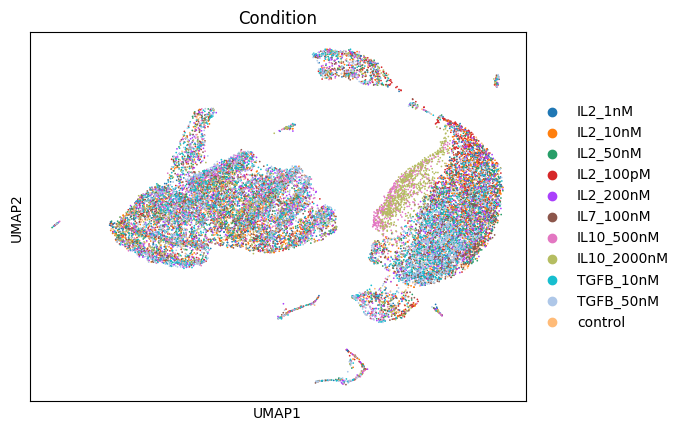

In [10]:
sc.pl.umap(data, color=["Condition"],)

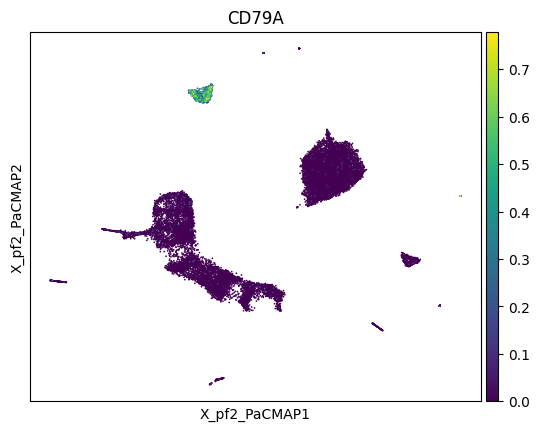

In [17]:
sc.pl.embedding(data, basis="X_pf2_PaCMAP", color=["CD79A"])

## Annotation Start

In [68]:
sc.pp.highly_variable_genes(data, min_mean=0.0001, max_mean=10, min_disp=0.01)
data_l = data[:, data.var.highly_variable.values]

/home/brianoj/.cache/pypoetry/virtualenvs/sccp-rvA4szVo-py3.11/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]
/home/brianoj/.cache/pypoetry/virtualenvs/sccp-rvA4szVo-py3.11/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:553: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["hvg"] = {"flavor": flavor}


In [69]:
print(data_l.obs.leiden.unique())

['19', '17', '1', '34', '10', ..., '41', '45', '38', '43', '46']
Length: 33
Categories (33, object): ['0', '1', '3', '4', ..., '42', '43', '45', '46']


/home/brianoj/.cache/pypoetry/virtualenvs/sccp-rvA4szVo-py3.11/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/brianoj/.cache/pypoetry/virtualenvs/sccp-rvA4szVo-py3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/brianoj/.cache/pypoetry/virtualenvs/sccp-rvA4szVo-py3.11/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To g

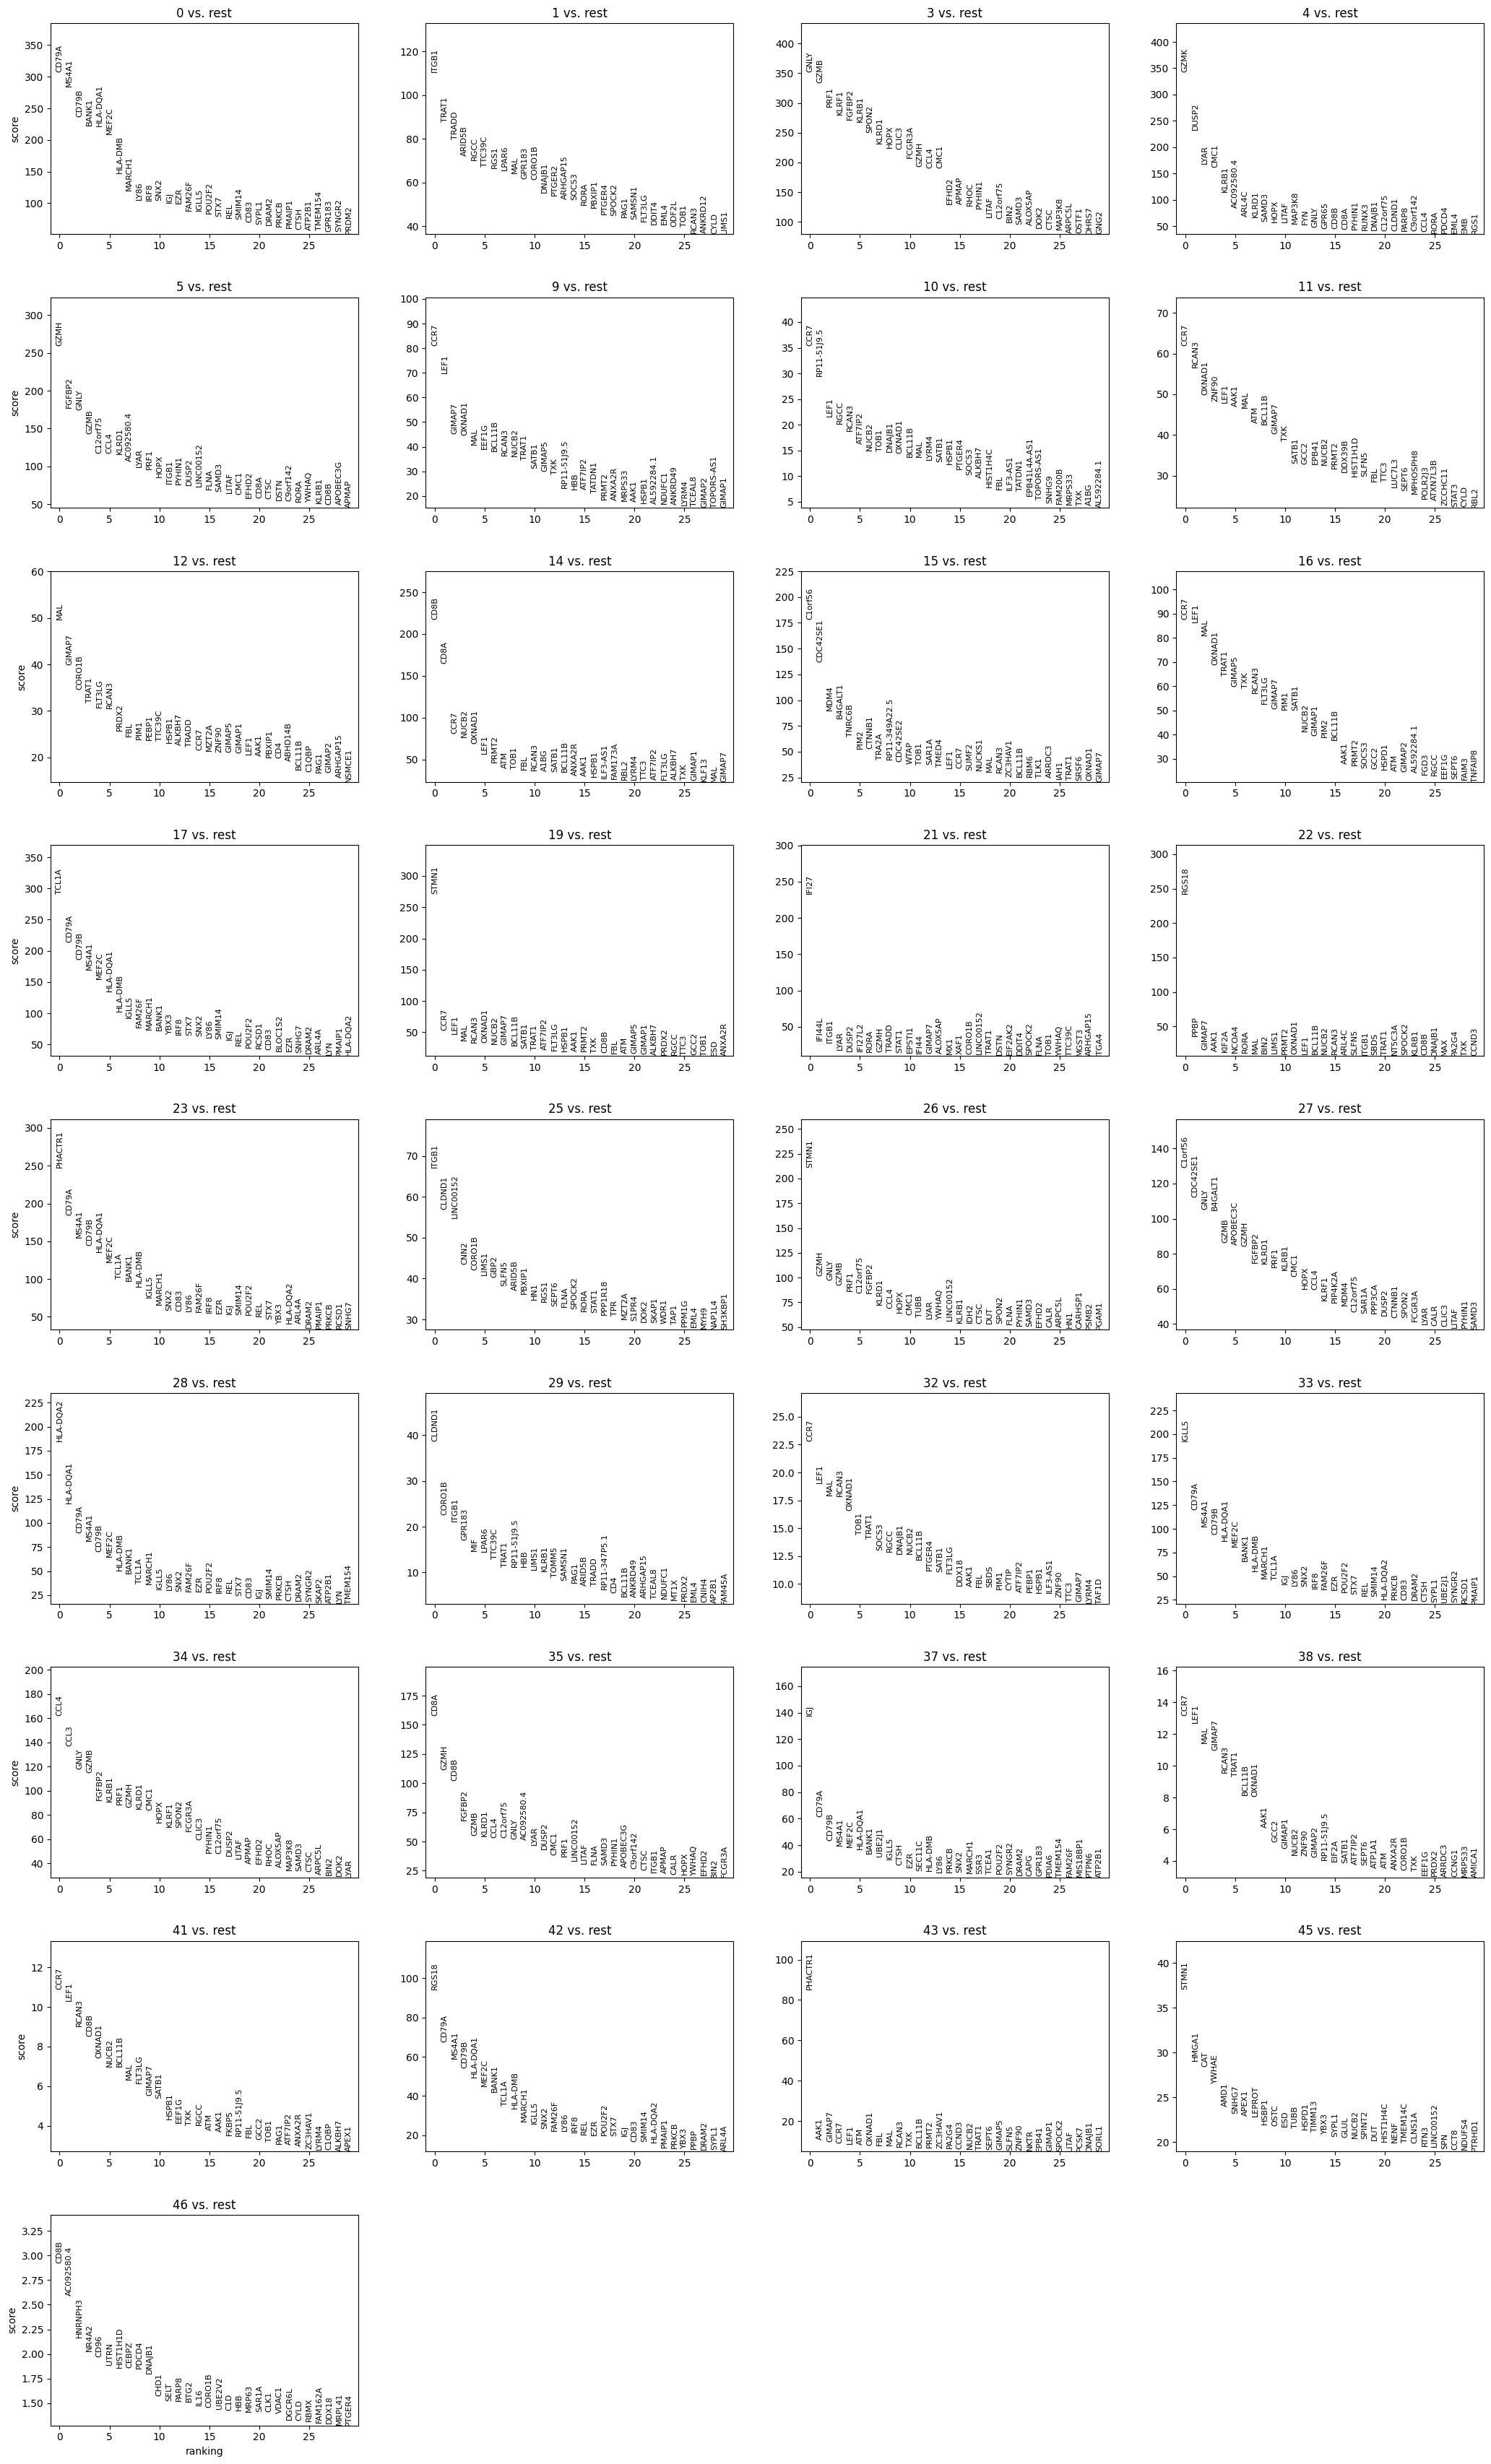

In [70]:
sc.tl.rank_genes_groups(data_l, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(data_l, n_genes=30, sharey=False, save=True)

In [71]:
celltypedict_layer2 = {"0": "B Naive",
                       "1": "T4 Naive",
                       "2": "CM", #Leave
                       "3": "NK Dim", #But a lot of NKG7 so maybe not?
                       "4": "T8 GZMK",
                       "5": "T8 GZMH",
                       "6": "CM", #Leave
                       "7": "CM", #Leave
                       "8": "nCM", #Leave
                       "9": "T4 Naive",
                       "10": "T4 Naive", #Treg
                       "11": "T4 Naive",
                       "12": "T4 EM", #Check
                       "13": "CM", #Leave
                       "14": "T8 Naive",
                       "15": "T4 Naive",
                       "16": "T4 Naive",
                       "17": "B Naive", #Treg
                       "18": "CM", #Leave
                       "19": "Prolif",
                       "20": "CM", #Leave
                       "21": "T4 EM", #Based on interferon response 
                       "22": "Null", 
                       "23": "B Naive", #No CD27 
                       "24": "cDC", #Leave
                       "25": "T4 Reg", #Based on interferon response 
                       "26": "T8 GZMH",
                       "27": "NK Dim",
                       "28": "B Mem",
                       "29": "T4 Reg", #Treg
                       "30": "CM", #Leave
                       "31": "CM", #Leave
                       "32": "T4 Naive", #Look again
                       "33": "B Plasma", 
                       "34": "NK Bright",
                       "35": "T8 GZMH",
                       "36": "CM", #Leave
                       "37": "B Plasma", 
                       "38": "T4 Naive",
                       "39": "pDC",
                       "40": "CM", #Leave
                       "41": "T4 Naive",
                       "42": "B Naive",
                       "43": "T4 Naive", #pDC?
                       "44": "CM",
                       "45": "Prolif",
                       "46": "T8 Naive", #Not sure
                       "47": "pDC",
                       }

data.obs["Cell Type2"] = data.obs.leiden.replace(celltypedict_layer2)

/tmp/ipykernel_390755/1865573002.py:51: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data.obs["Cell Type2"] = data.obs.leiden.replace(celltypedict_layer2)


/home/brianoj/.cache/pypoetry/virtualenvs/sccp-rvA4szVo-py3.11/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


/home/brianoj/.cache/pypoetry/virtualenvs/sccp-rvA4szVo-py3.11/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


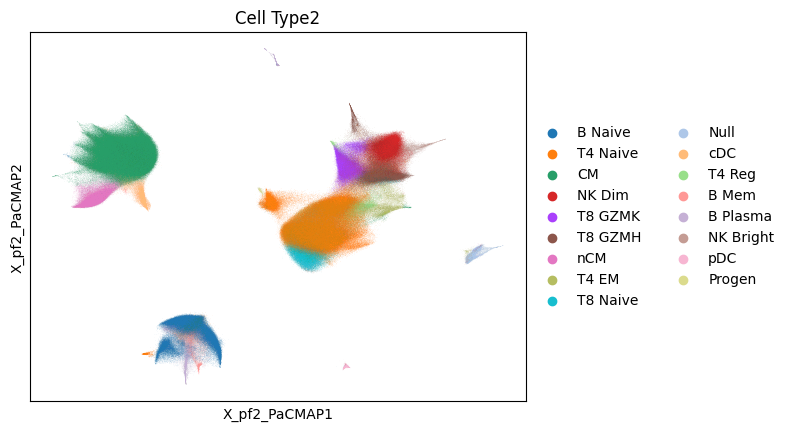

In [72]:
sc.pl.embedding(data, basis="X_pf2_PaCMAP", color=["Cell Type2"])

/home/brianoj/.cache/pypoetry/virtualenvs/sccp-rvA4szVo-py3.11/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/brianoj/.cache/pypoetry/virtualenvs/sccp-rvA4szVo-py3.11/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


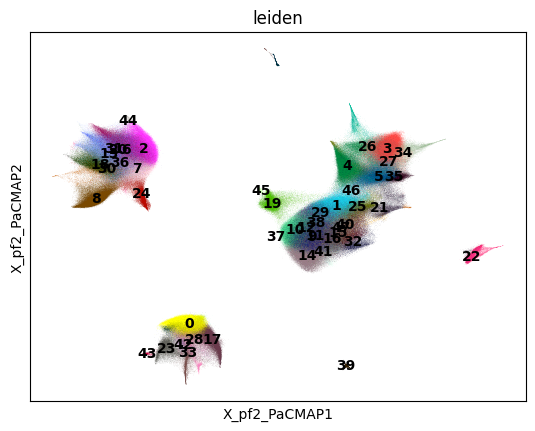

In [74]:
sc.pl.embedding(data, basis="X_pf2_PaCMAP", color=["leiden"], legend_loc="on data")

### Myeloid Compartment

In [75]:
data_m = an.read_h5ad("Lupus_Neighbors_10N_3R.h5ad")
data_m.obs["louvain_orig"] = data_m.obs["louvain"]
data_m.obs = data_m.obs.rename(columns={"Cell Type": "Cell Type Old"})
data_m.obs["Cell Type"] = data_m.obs.leiden.replace(celltypedict_layer1)
data_m = data[data.obs["Cell Type"].isin(["CM", "nCM", "cDC", "pDC"]).values, :]

/tmp/ipykernel_390755/3908648012.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data_m.obs["Cell Type"] = data_m.obs.leiden.replace(celltypedict_layer1)


/home/brianoj/.cache/pypoetry/virtualenvs/sccp-rvA4szVo-py3.11/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/brianoj/.cache/pypoetry/virtualenvs/sccp-rvA4szVo-py3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


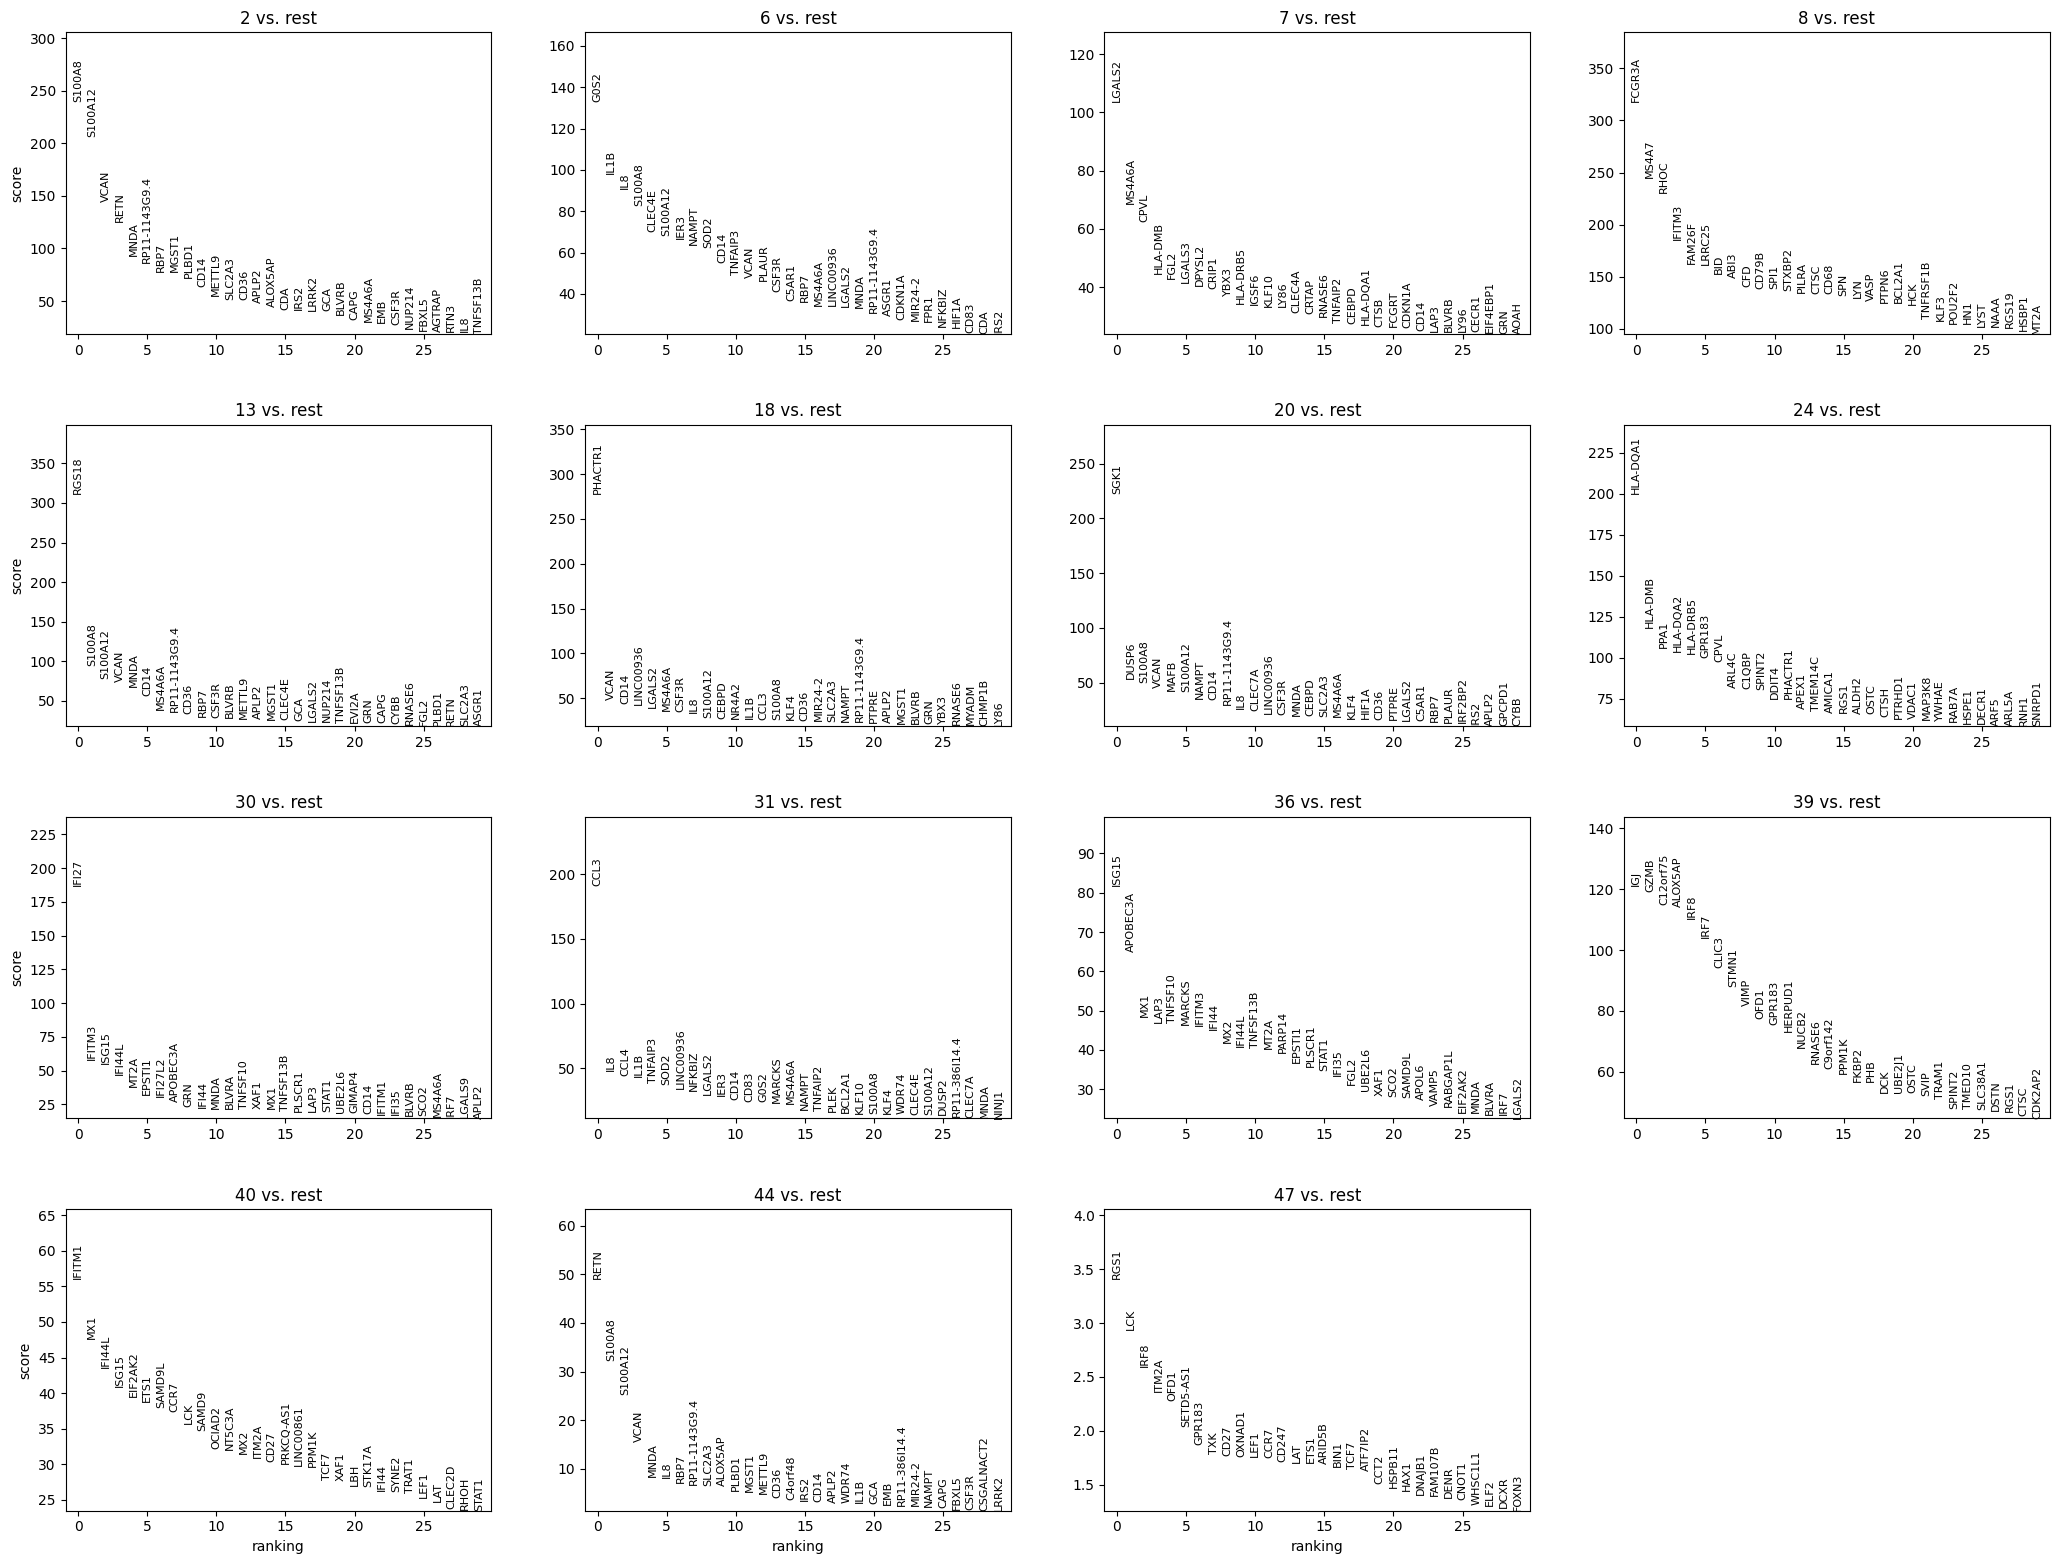

In [76]:
sc.tl.rank_genes_groups(data_m, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(data_m, n_genes=30, sharey=False, save=True)

In [4]:
celltypedict_layer2 = {"0": "B Naive",
                       "1": "T4 Naive",
                       "2": "CM",
                       "3": "NK Dim",
                       "4": "T8 GZMK",
                       "5": "T8 GZMH",
                       "6": "CM",
                       "7": "cDC1",
                       "8": "nCM",
                       "9": "T4 Naive",
                       "10": "T4 Naive",
                       "11": "T4 Naive",
                       "12": "T4 EM",
                       "13": "CM",
                       "14": "T8 Naive",
                       "15": "T4 Naive",
                       "16": "T4 Naive",
                       "17": "B Naive",
                       "18": "CM",
                       "19": "Prolif",
                       "20": "CM",
                       "21": "T4 EM",
                       "22": "Null", 
                       "23": "B Naive",
                       "24": "cDC2",
                       "25": "T4 Reg",
                       "26": "T8 GZMH",
                       "27": "NK Dim",
                       "28": "B Mem",
                       "29": "T4 Reg",
                       "30": "CM",
                       "31": "CM",
                       "32": "T4 Naive", 
                       "33": "B Plasma", 
                       "34": "NK Bright",
                       "35": "T8 GZMH",
                       "36": "nCM",
                       "37": "B Plasma", 
                       "38": "T4 Naive",
                       "39": "pDC",
                       "40": "CM",
                       "41": "T4 Naive",
                       "42": "B Naive",
                       "43": "T4 Naive",
                       "44": "CM",
                       "45": "Prolif",
                       "46": "T8 Naive",
                       "47": "pDC",
                       }


data.obs["Cell Type2"] = data.obs.leiden.replace(celltypedict_layer2)

/tmp/ipykernel_959565/1947409935.py:52: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data.obs["Cell Type2"] = data.obs.leiden.replace(celltypedict_layer2)


/home/brianoj/.cache/pypoetry/virtualenvs/sccp-rvA4szVo-py3.11/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/brianoj/.cache/pypoetry/virtualenvs/sccp-rvA4szVo-py3.11/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


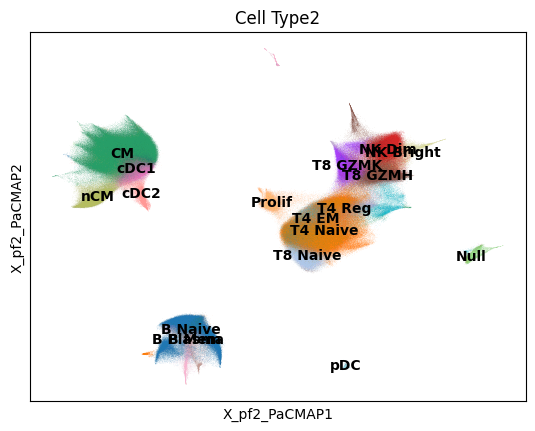

In [5]:
sc.pl.embedding(data, basis="X_pf2_PaCMAP", color=["Cell Type2"], legend_loc="on data")

In [6]:
print(data)

AnnData object with n_obs × n_vars = 1263673 × 2161
    obs: 'pool', 'patient', 'Processing_Cohort', 'louvain', 'Cell Type Old', 'cell_type_lympho', 'L3', 'Condition', 'age', 'sex', 'ancestry', 'Status', 'SLE_status', 'CD103|ITGAE', 'CD137|TNFRSF9', 'CD274|CD274', 'CD11b|ITGAM', 'CD39|ENTPD1', 'CD197|CCR7', 'CD20|MS4A1', 'CD45RA|PTPRC', 'CD69|CD69', 'CD275|ICOSLG', 'CD278|ICOS', 'CD134|TNFRSF4', 'CD279|PDCD1', 'TCRgd|TRD_TRG', 'Tim3|HAVCR2', 'CD152|CTLA4', 'CD223|LAG3', 'CD56|NCAM1', 'CD123|IL3RA', 'CD81|CD81', 'CD38|CD38', 'CD95|FAS', 'CD28|CD28', 'CD27|CD27', 'CD25|IL2RA', 'CD8|CD8A', 'CD127|IL7R', 'CD2|CD2', 'CD19|CD19', 'CD183|CXCR3', 'CD4|CD4', 'CD3|CD3E', 'CD196|CCR6', 'CD45RO|PTPRC', 'CD14|CD14', 'CD194|CCR4', 'CD185|CXCR5', 'CD45|PTPRC', 'CD24|CD24', 'CD7|CD7', 'CD33|CD33', 'CD90|THY1', 'CD80|CD80', 'CD5|CD5', 'CD235a_b|GYPA_GYPB', 'CD62L|SELL', 'CD13|ANPEP', 'CD10|MME', 'CD272|BTLA', 'CD16|FCGR3A', 'CD44|CD44', 'CD11c|ITGAX', 'CD86|CD86', 'IgD|IGHD', 'IgG|IGHG1_2_3_4', 'CD184|

### Save Cell Types

In [7]:
cellDF = data.obs[["Cell Type", "Cell Type2"]]
cellDF.columns = ["Cell Type", "Cell Type2"]
cellDF.index.name = None
cellDF.to_csv("LupusCellTypesFinal.csv")
data.write_h5ad("Lupus_Annotated_Final_Updated.h5ad")

In [ ]:
"""
celltypedict_layer1 = {"0": "NK",
                       "1": "B",
                       "2": "T8", #Questiomable
                       "3": "T4",
                       "4": "T8",
                       "5": "T4",
                       "6": "T8",
                       "7": "CM",
                       "8": "nCM",
                       "9": "T4",
                       "10": "T4", #Treg
                       "11": "T4",
                       "12": "CM",
                       "13": "CM",
                       "14": "CM",
                       "15": "T4",
                       "16": "B",
                       "17": "T4", #Treg
                       "18": "CM",
                       "19": "Prolif",
                       "20": "CM",
                       "21": "CM",
                       "22": "T4", #Questionable
                       "23": "T4", #Questionable
                       "24": "B",
                       "25": "Prolif",
                       "26": "NK",
                       "27": "cDC",
                       "28": "cDC",
                       "29": "CM",
                       "30": "nCM", #Intermediate
                       "31": "T4", #Questionable
                       "32": "B", 
                       "33": "CM", #Neutrophil
                       "34": "B",
                       "35": "PB",
                       "36": "T4",
                       "37": "pDC", #Questionable
                       "38": "Prolif",
                       "39": "B",
                       "40": "B",
                       "41": "T4",
                       "42": "Prolif",
                       "43": "pDC",
                       "44": "pDC",
                       "45": "pDC",
                       "46": "pDC",
                       "47": "pDC",
                       }
"""